In [2]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Définir les variables symboliques
x, y = sp.symbols('x y')

# Définir la fonction objectif
J = x + y

# Définir les contraintes
g1 = (x - 1)**2 + y**2 - 1
g2 = (x + 4)**2 + (y + 3)**2 - 25
hessian_g1 = sp.Matrix([[sp.diff(g1, x, x), sp.diff(g1, x, y)], [sp.diff(g1, y, x), sp.diff(g1, y, y)]])
hessian_g2 = sp.Matrix([[sp.diff(g2, x, x), sp.diff(g2, x, y)], [sp.diff(g2, y, x), sp.diff(g2, y, y)]])

# Afficher les hessiennes
print("Hessienne de g1:")
sp.pprint(hessian_g1)
print("\nHessienne de g2:")
sp.pprint(hessian_g2)

Hessienne de g1:
⎡2  0⎤
⎢    ⎥
⎣0  2⎦

Hessienne de g2:
⎡2  0⎤
⎢    ⎥
⎣0  2⎦


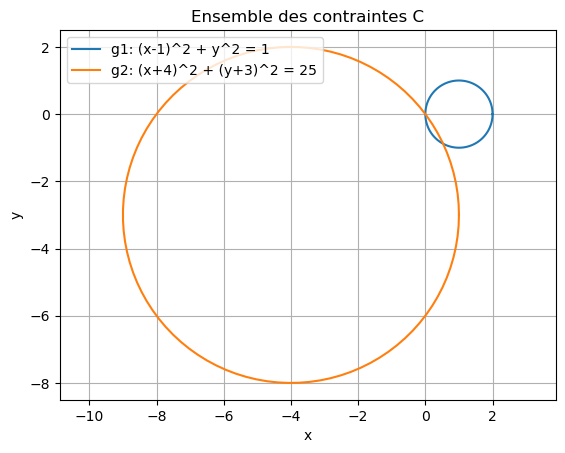

In [12]:
theta = np.linspace(0, 2*np.pi, 100)
x1 = 1 + np.sqrt(1)*np.cos(theta)
y1 = np.sqrt(1)*np.sin(theta)

x2 = -4 + 5*np.cos(theta)
y2 = -3 + 5*np.sin(theta)

plt.figure()
plt.plot(x1, y1, label='g1: (x-1)^2 + y^2 = 1')
plt.plot(x2, y2, label='g2: (x+4)^2 + (y+3)^2 = 25')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc="upper left")
plt.grid(True)
plt.axis('equal')
plt.title('Ensemble des contraintes C')
plt.show()

In [5]:
lambda1, lambda2 = sp.symbols('lambda1 lambda2')
stationarity = sp.Matrix([sp.diff(J, x) + lambda1 * sp.diff(g1, x) + lambda2 * sp.diff(g2, x),
                          sp.diff(J, y) + lambda1 * sp.diff(g1, y) + lambda2 * sp.diff(g2, y)])

# Résoudre le système d'équations
solutions = sp.solve([stationarity[0], stationarity[1], g1, g2], (x, y, lambda1, lambda2), dict=True)

# Afficher les solutions
print("\nSolutions du problème:")
for sol in solutions:
    sp.pprint(sol)


Solutions du problème:
{λ₁: -1/6, λ₂: -1/6, x: 0, y: 0}
⎧     41                          -15 ⎫
⎨λ₁: ───, λ₂: -7/102, x: 9/17, y: ────⎬
⎩    102                           17 ⎭


## Exc 2

In [13]:
import numpy as np
from scipy.optimize import minimize

# Définir la fonction J(x)
def J(x, u, A):
    return np.linalg.norm(x - u)**2 + np.linalg.norm(A @ x)**2

# Définir la matrice A
n = 3  # Dimention n=3
A = np.zeros((n-2, n))
for i in range(n-2):
    A[i, i] = 1
    A[i, i+1] = -2
    A[i, i+2] = 1

# Définir u
u = np.random.rand(n)

# Définir les contraintes x1 <= x2 <= ... <= xn
constraints = []
for i in range(n-1):
    constraints.append({'type': 'ineq', 'fun': lambda x, i=i: x[i+1] - x[i]})

# Résolution du problème d'optimisation
x0 = np.random.rand(n)  # Point initial
res = minimize(J, x0, args=(u, A), constraints=constraints)

print("Solution optimale x:", res.x)

Solution optimale x: [0.49695066 0.59506403 0.77113037]


## EXC 3

In [1]:
import sympy as sp

# Définir les variables symboliques
x, y, z, lambda_, mu = sp.symbols('x y z lambda mu')

# Définir la fonction objectif
J = x**2 + y**2 + z**2

# Définir les contraintes
h = x + y + z - 1
g = x**2 + y**2 - 1

# Calculer les gradients
grad_J = sp.Matrix([sp.diff(J, var) for var in (x, y, z)])
grad_h = sp.Matrix([sp.diff(h, var) for var in (x, y, z)])
grad_g = sp.Matrix([sp.diff(g, var) for var in (x, y, z)])

# Conditions de stationnarité
stationarity = grad_J + lambda_ * grad_h + mu * grad_g

# Résoudre le système d'équations
solutions = sp.solve([stationarity[0], stationarity[1], stationarity[2], h, g], (x, y, z, lambda_, mu), dict=True)

# Afficher les solutions
print("Solutions du problème:")
for sol in solutions:
    sp.pprint(sol)

# Vérifier la dual feasibility (mu >= 0)
valid_solutions = [sol for sol in solutions if sol[mu] >= 0]

# Afficher les solutions valides
print("\nSolutions valides (mu >= 0):")
for sol in valid_solutions:
    sp.pprint(sol)

Solutions du problème:
{λ: 0, μ: -1, x: 0, y: 1, z: 0}
{λ: 0, μ: -1, x: 1, y: 0, z: 0}
⎧                             √2     √2           ⎫
⎨λ: -2 + 2⋅√2, μ: -3 + √2, x: ──, y: ──, z: 1 - √2⎬
⎩                             2      2            ⎭
⎧                             -√2      -√2            ⎫
⎨λ: -2⋅√2 - 2, μ: -3 - √2, x: ────, y: ────, z: 1 + √2⎬
⎩                              2        2             ⎭

Solutions valides (mu >= 0):
